# QS World University Rankings 2021

### Import Dependencies

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns

### Extract CSVs into DataFrames

In [2]:
ranking_2021 = "Resources/QS World University Rankings 2021.csv"
ranking_2021_df = pd.read_csv(ranking_2021)
ranking_2021_df.head()

,year,rank_display,university,score,link,country,city,region,logo
0,2021,1,Massachusetts Institute of Technology (MIT),100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...
1,2021,2,Stanford University,98.4,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...
2,2021,3,Harvard University,97.9,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...
3,2021,4,California Institute of Technology (Caltech),97.0,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...
4,2021,5,University of Oxford,96.7,https://www.topuniversities.com/universities/u...,United Kingdom,Oxford,Europe,https://www.topuniversities.com/sites/default/...


In [3]:
# review the columns of the dataframe
ranking_2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1185 non-null   int64  
 1   rank_display  1158 non-null   object 
 2   university    1185 non-null   object 
 3   score         501 non-null    float64
 4   link          1185 non-null   object 
 5   country       1185 non-null   object 
 6   city          1145 non-null   object 
 7   region        1185 non-null   object 
 8   logo          1185 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 83.4+ KB


### Transform QS World University Rankings 2021 Dataframe

In [4]:
# create a filtered dataframe from specific columns
ranking_2021_cols = ["year", "rank_display", "university", "score", "country", "city", "region"]
ranking_2021_transformed= ranking_2021_df[ranking_2021_cols].copy()

In [5]:
ranking_2021_transformed

,year,rank_display,university,score,country,city,region
0,2021,1,Massachusetts Institute of Technology (MIT),100.0,United States,Cambridge,North America
1,2021,2,Stanford University,98.4,United States,Stanford,North America
2,2021,3,Harvard University,97.9,United States,Cambridge,North America
3,2021,4,California Institute of Technology (Caltech),97.0,United States,Pasadena,North America
4,2021,5,University of Oxford,96.7,United Kingdom,Oxford,Europe
...,...,...,...,...,...,...,...
1180,2021,NaN,Weizmann Institute of Science,NaN,Israel,Rehovot,Asia
1181,2021,1001+,Universitatea de Vest din Timisoara / West Un...,NaN,Romania,Timișoara,Europe
1182,2021,NaN,WHU - Otto Beisheim School of Management,NaN,Germany,Vallendar,Europe
1183,2021,1001+,Yarmouk University,NaN,Jordan,Irbid,Asia


<AxesSubplot:>

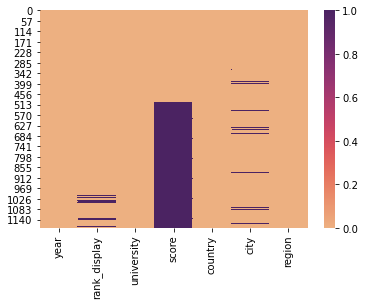

In [6]:
# check missing values
sns.heatmap(ranking_2021_transformed.isna(),cmap='flare')

In [7]:
# check for nan values in column rank_display


ranking_2021_transformed[ranking_2021_transformed['rank_display'].isna()]



,year,rank_display,university,score,country,city,region
1011,2021,NaN,Baylor College of Medicine,NaN,United States,Houston,North America
1014,2021,NaN,BI Norwegian Business School,NaN,Norway,Oslo,Europe
1019,2021,NaN,Central European University,NaN,Austria,Vienna,Europe
1021,2021,NaN,Copenhagen Business School,NaN,Denmark,Frederiksberg,Europe
1022,2021,NaN,Cranfield University,NaN,United Kingdom,Bedford,Europe
1029,2021,NaN,ESCP Business School - Paris,NaN,France,Paris,Europe
1031,2021,NaN,ESSEC Business School,NaN,France,Cergy,Europe
1036,2021,NaN,Institut polytechnique de Grenoble - Grenoble ...,NaN,France,Grenoble,Europe
1038,2021,NaN,HEC Paris School of Management,NaN,France,Paris,Europe
1040,2021,NaN,IMT Atlantique,NaN,France,Nantes,Europe


In [8]:
# replace nan values in column rank_display with zero

ranking_2021_transformed['rank_display'] = ranking_2021_transformed['rank_display'].fillna(0)

In [9]:
ranking_2021_transformed[ranking_2021_transformed['rank_display'].isna()]

,year,rank_display,university,score,country,city,region


In [10]:
ranking_2021_transformed['rank'] = ranking_2021_transformed['rank_display'].str.split('-').str[0]

In [11]:
ranking_2021_transformed['rank'] = ranking_2021_transformed['rank_display'].str.split('+').str[0]

In [12]:
ranking_2021_transformed

,year,rank_display,university,score,country,city,region,rank
0,2021,1,Massachusetts Institute of Technology (MIT),100.0,United States,Cambridge,North America,1
1,2021,2,Stanford University,98.4,United States,Stanford,North America,2
2,2021,3,Harvard University,97.9,United States,Cambridge,North America,3
3,2021,4,California Institute of Technology (Caltech),97.0,United States,Pasadena,North America,4
4,2021,5,University of Oxford,96.7,United Kingdom,Oxford,Europe,5
...,...,...,...,...,...,...,...,...
1180,2021,0,Weizmann Institute of Science,NaN,Israel,Rehovot,Asia,NaN
1181,2021,1001+,Universitatea de Vest din Timisoara / West Un...,NaN,Romania,Timișoara,Europe,1001
1182,2021,0,WHU - Otto Beisheim School of Management,NaN,Germany,Vallendar,Europe,NaN
1183,2021,1001+,Yarmouk University,NaN,Jordan,Irbid,Asia,1001


In [13]:
ranking_2021_transformed['rank'] = ranking_2021_transformed['rank'].fillna(0)

In [17]:
ranking_2021_transformed

,year,rank_display,university,score,country,city,region,rank
0,2021,1,Massachusetts Institute of Technology (MIT),100.0,United States,Cambridge,North America,1
1,2021,2,Stanford University,98.4,United States,Stanford,North America,2
2,2021,3,Harvard University,97.9,United States,Cambridge,North America,3
3,2021,4,California Institute of Technology (Caltech),97.0,United States,Pasadena,North America,4
4,2021,5,University of Oxford,96.7,United Kingdom,Oxford,Europe,5
...,...,...,...,...,...,...,...,...
1180,2021,0,Weizmann Institute of Science,NaN,Israel,Rehovot,Asia,0
1181,2021,1001+,Universitatea de Vest din Timisoara / West Un...,NaN,Romania,Timișoara,Europe,1001
1182,2021,0,WHU - Otto Beisheim School of Management,NaN,Germany,Vallendar,Europe,0
1183,2021,1001+,Yarmouk University,NaN,Jordan,Irbid,Asia,1001
